In [1]:
#导入np, plt, pd等包
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

**接下来我们导入自行车的数据。我们想看下人们更喜欢周内骑车去工作呢？还是周末骑车去健身？**

# 4.1 在我们的数据里面加入‘weekday’列

**首先，我们和以前一样导入数据**

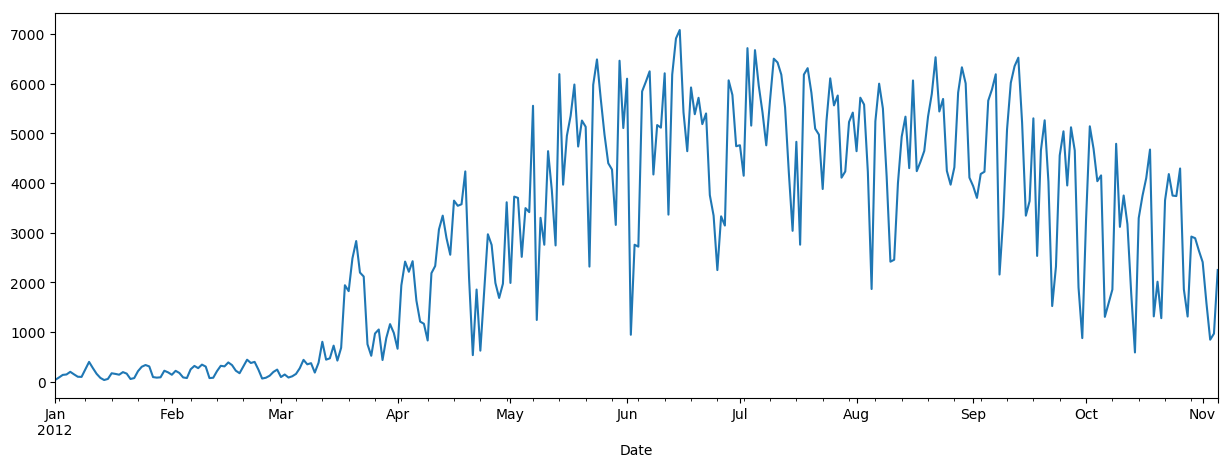

In [2]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

**接下来，我们只选取‘Berri’这一条自行车路径来看看。**

In [3]:
berri_bikes = bikes[['Berri 1']].copy()

In [4]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


**下一步，我们需要在数据中添加‘weekday’列。首先，我们可以直接从index里面获得。index就是数据中最左边‘Date’列下面的数据**

In [5]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

**我们发现一年中一共才310天，说明有些天的数据丢失了！
Pandas中有很多关于时间的函数，如果我们想为每行都获得该月的日期，我们可以这样:**

In [6]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

**实际上，我们想得到的是周几，所以这样：**

In [7]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

**其中0代表的是周一。然后我们把这列数据加到‘weekday’列里面。**

In [9]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 根据周几把骑自行车的数目加起来

**数据结构中有一个和SQL类似的.groupby()方法，这里我们直接使用：
"berri_bikes.groupby('weekday').aggregate(sum)", 它的意思是：“根据weekday来分组，并对每组所有行求和”

In [11]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


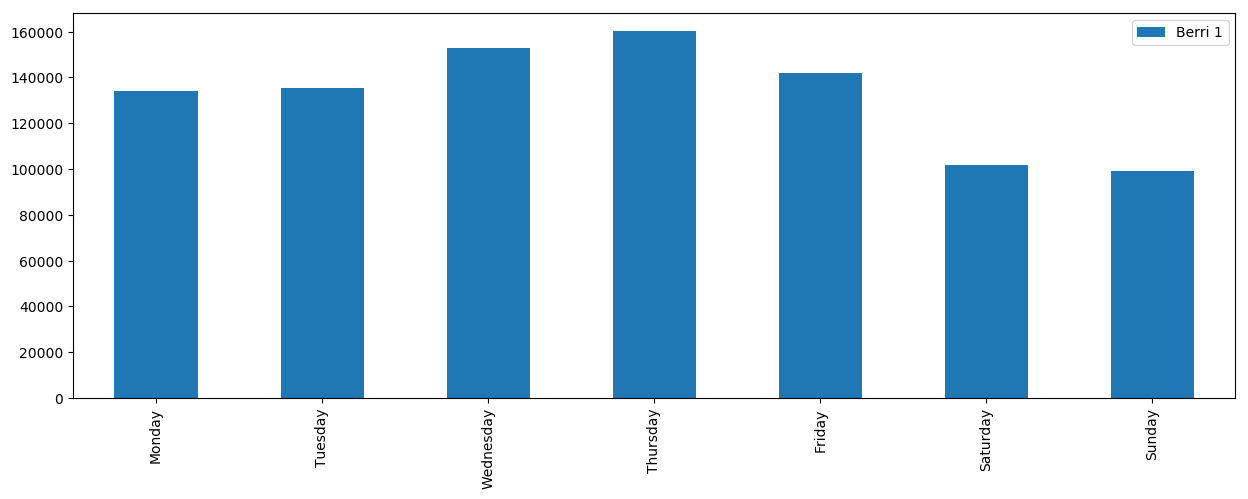

In [13]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts
weekday_counts.plot(kind='bar')

**看来该地区人们骑车出行是为了工作**

# 4.3 总结

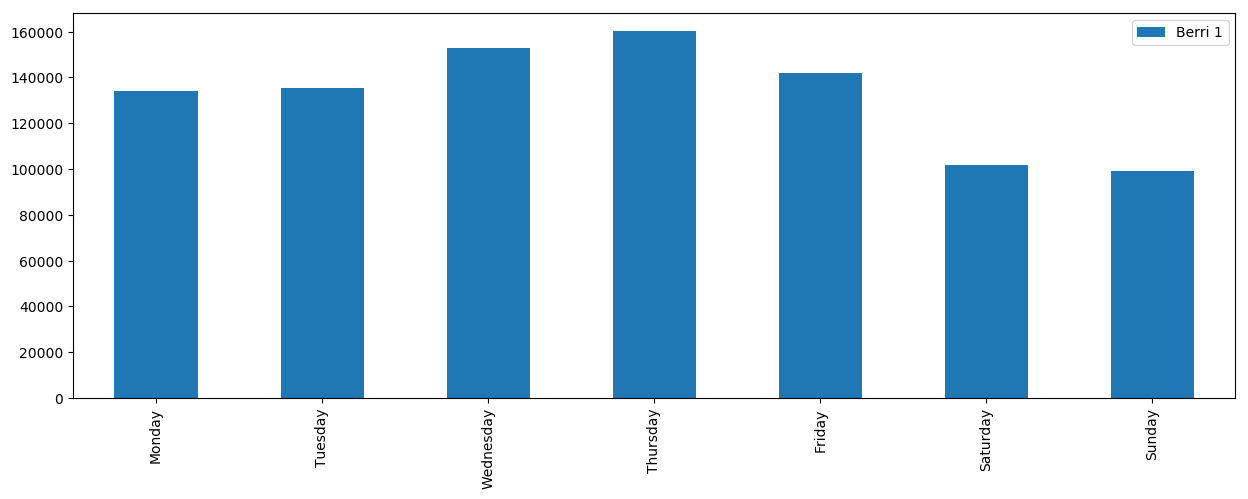

In [15]:
bikes = pd.read_csv('data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# 添加weekday列
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# 加起来！画图！
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')